In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.2, random_state = 495)


In [5]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
574,1,143,86,30,330,30.1,0.892,23
587,6,103,66,0,0,24.3,0.249,29
190,3,111,62,0,0,22.6,0.142,21
337,5,115,76,0,0,31.2,0.343,44
338,9,152,78,34,171,34.2,0.893,33


In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
classifier = DecisionTreeClassifier(random_state=495)
model = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       101
           1       0.60      0.66      0.63        53

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



The above tree is built out to its max depth, prune using simple accuracy

In [49]:
def classify_and_get_accuracy(max_depth):
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=495)
    model = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

accuracies = [(x, classify_and_get_accuracy(x)) for x in range(2,model.get_depth())]
max(accuracies, key=lambda x: x[1])

(6, 0.7662337662337663)

In [50]:
classifier = DecisionTreeClassifier(max_depth=6, random_state=495)
model = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       101
           1       0.68      0.60      0.64        53

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



Seaborn isn't displaying the numbers on the bottom two cells for some reason?

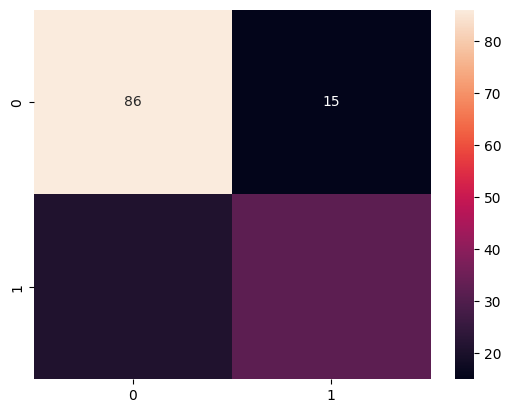

In [51]:
sns.heatmap(cm, annot = True)
print()

In [53]:
cm

array([[86, 15],
       [21, 32]])

[Text(0.4245689655172414, 0.9285714285714286, 'x[1] <= 0.767\ngini = 0.455\nsamples = 614\nvalue = [399, 215]'),
 Text(0.13577586206896552, 0.7857142857142857, 'x[5] <= -0.606\ngini = 0.371\nsamples = 480\nvalue = [362, 118]'),
 Text(0.034482758620689655, 0.6428571428571429, 'x[1] <= -0.467\ngini = 0.098\nsamples = 135\nvalue = [128, 7]'),
 Text(0.017241379310344827, 0.5, 'gini = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(0.05172413793103448, 0.5, 'x[6] <= -0.205\ngini = 0.206\nsamples = 60\nvalue = [53, 7]'),
 Text(0.034482758620689655, 0.35714285714285715, 'x[6] <= -0.782\ngini = 0.307\nsamples = 37\nvalue = [30, 7]'),
 Text(0.017241379310344827, 0.21428571428571427, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.05172413793103448, 0.21428571428571427, 'x[2] <= -0.671\ngini = 0.434\nsamples = 22\nvalue = [15, 7]'),
 Text(0.034482758620689655, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06896551724137931, 0.07142857142857142, 'gini = 0.375\nsamples

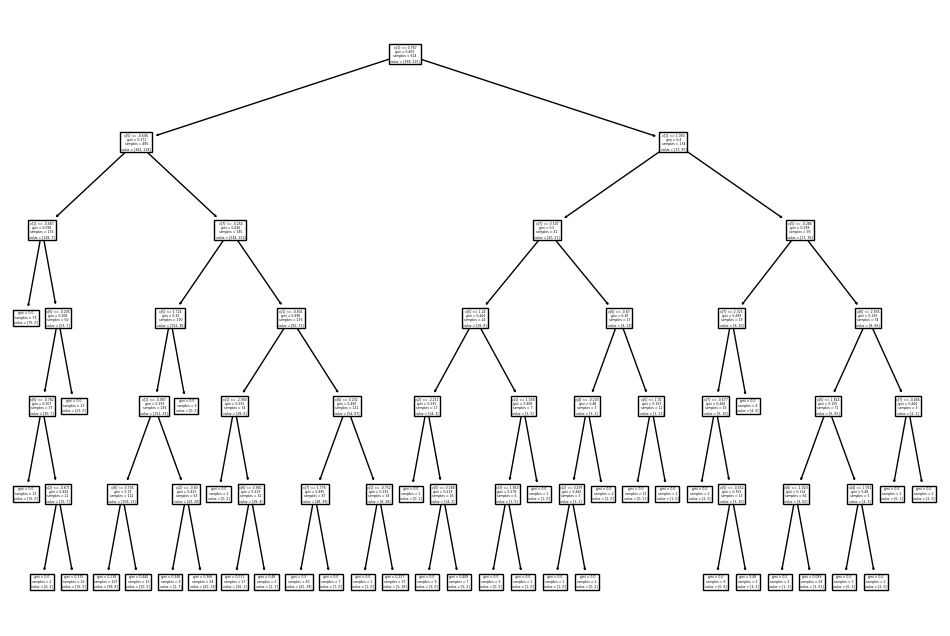

In [54]:
plt.figure(figsize=(12,8))
plot_tree(model)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
clf.feature_importances_

array([0.09155152, 0.25310072, 0.09869193, 0.06423595, 0.06871307,
       0.16958321, 0.12042407, 0.13369955])

In [65]:
feature_imp = pd.Series(clf.feature_importances_, index=list(df)[:-1]).sort_values(ascending=False)
feature_imp

Glucose                     0.253101
BMI                         0.169583
Age                         0.133700
DiabetesPedigreeFunction    0.120424
BloodPressure               0.098692
Pregnancies                 0.091552
Insulin                     0.068713
SkinThickness               0.064236
dtype: float64

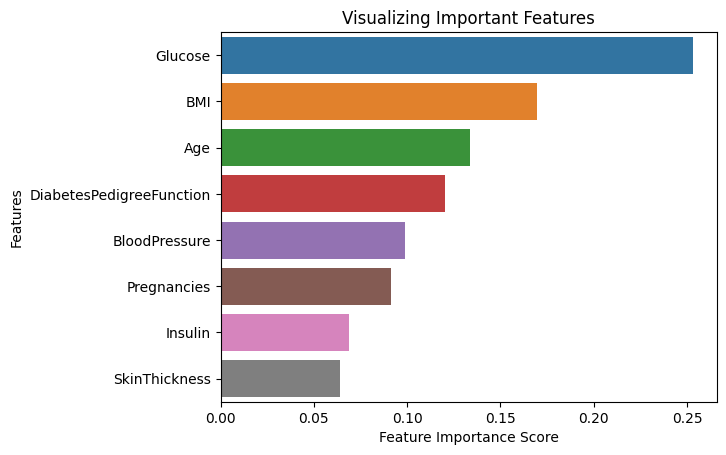

In [68]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()